Merge Sort: Comparisons = 220101401, Time = 42.7355 seconds
Hybrid Sort (S=16): Comparisons = 228393093, Time = 41.1064 seconds


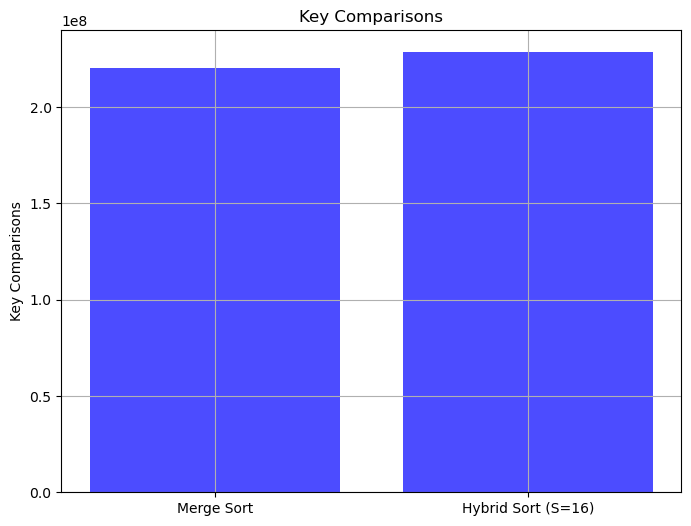

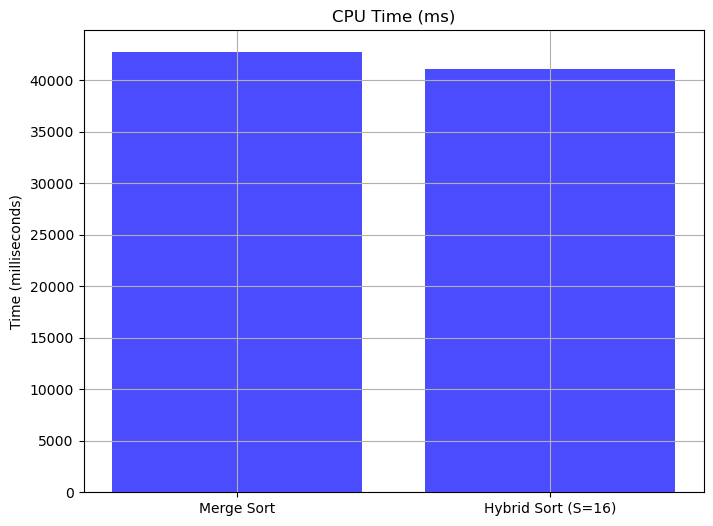

In [5]:
import matplotlib.pyplot as plt
import time
import pandas as pd

# Global variable to count key comparisons
comparison_count = 0

# Hybrid Sort with comparison count (S = 16)
def hybrid_sort(arr, S=16):
    global comparison_count
    if len(arr) <= S:
        insertion_sort(arr)
    else:
        if len(arr) > 1:
            mid = len(arr) // 2
            left_half = arr[:mid]
            right_half = arr[mid:]

            hybrid_sort(left_half, S)
            hybrid_sort(right_half, S)

            i = j = k = 0
            while i < len(left_half) and j < len(right_half):
                comparison_count += 1  # Increment comparison count
                if left_half[i] < right_half[j]:
                    arr[k] = left_half[i]
                    i += 1
                else:
                    arr[k] = right_half[j]
                    j += 1
                k += 1

            while i < len(left_half):
                arr[k] = left_half[i]
                i += 1
                k += 1

            while j < len(right_half):
                arr[k] = right_half[j]
                j += 1
                k += 1

# Insertion Sort (used in Hybrid Sort)
def insertion_sort(arr):
    global comparison_count
    n = len(arr)
    for i in range(1, n):
        j = i
        while j > 0 and arr[j] < arr[j - 1]:
            comparison_count += 1  # Increment comparison count
            arr[j], arr[j - 1] = arr[j - 1], arr[j]  # Swap elements
            j -= 1
        comparison_count += 1  # Last comparison where arr[j] >= arr[j - 1]
    return arr

# Merge Sort with comparison count
def merge_sort(arr):
    global comparison_count
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0
        while i < len(left_half) and j < len(right_half):
            comparison_count += 1  # Count each comparison
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
            
# Function to compare Merge Sort and Hybrid Sort
def compare_sorts(dataset):
    global comparison_count

    # Load the dataset
    arr = dataset.copy()

    # 1. Measure Merge Sort
    comparison_count = 0  # Reset comparison count
    start_time = time.time()
    merge_sort(arr.copy())  # Perform Merge Sort
    merge_sort_time = time.time() - start_time
    merge_sort_comparisons = comparison_count
    print(f"Merge Sort: Comparisons = {merge_sort_comparisons}, Time = {merge_sort_time:.4f} seconds")

    # 2. Measure Hybrid Sort with S = 16
    comparison_count = 0  # Reset comparison count
    start_time = time.time()
    hybrid_sort(arr.copy(), S=16)  # Use S = 16
    hybrid_sort_time = time.time() - start_time
    hybrid_sort_comparisons = comparison_count
    print(f"Hybrid Sort (S=16): Comparisons = {hybrid_sort_comparisons}, Time = {hybrid_sort_time:.4f} seconds")

    # Return the comparison counts and times
    return merge_sort_comparisons, hybrid_sort_comparisons, merge_sort_time, hybrid_sort_time

# Load the dataset from CSV file
dataset = pd.read_csv('dataset_10000000.csv')['Value'].tolist()

# Compare the sorts
merge_sort_comparisons, hybrid_sort_comparisons, merge_sort_time, hybrid_sort_time = compare_sorts(dataset)

# Plot separate graphs for comparisons and time
def plot_comparison_results():
    algorithms = ['Merge Sort', 'Hybrid Sort (S=16)']
    times = [merge_sort_time, hybrid_sort_time]
    comparisons = [merge_sort_comparisons, hybrid_sort_comparisons]

    # 1. Plot for Key Comparisons
    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, comparisons, color='blue', alpha=0.7)
    plt.title('Key Comparisons')
    plt.ylabel('Key Comparisons')
    plt.grid(True)
    plt.show()

    # 2. Plot for CPU Time
    plt.figure(figsize=(8, 6))
    plt.bar(algorithms, [time * 1000 for time in times], color='blue', alpha=0.7)  # Convert to milliseconds
    plt.title('CPU Time (ms)')
    plt.ylabel('Time (milliseconds)')
    plt.grid(True)
    plt.show()

# Plot the results
plot_comparison_results()